<a href="https://colab.research.google.com/github/young0jin/CustomsNotifyAnalyzer/blob/main/NLP/BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bertopic

In [2]:
from bertopic import BERTopic
import pandas as pd

In [29]:
# 원본 CSV 파일의 "Raw" URL을 사용
extracted_text = pd.read_csv('https://raw.githubusercontent.com/young0jin/CustomsNotifyAnalyzer/refs/heads/main/NLP/extracted_text.csv')
class_table = pd.read_csv('https://raw.githubusercontent.com/young0jin/CustomsNotifyAnalyzer/refs/heads/main/%EB%B6%84%EB%A5%98%20CSV/%EC%86%8C%EB%B6%84%EB%A5%98%20%ED%85%8C%EC%9D%B4%EB%B8%94.csv')
display(extracted_text.head())
display(class_table.head())

,page,text
0,1,U.S. Customs and Border Protection ◆ DEPARTMEN...
1,2,"2 CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO...."
2,3,"3 CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO...."
3,4,"4 CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO...."
4,5,"5 CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO...."


,index,HS-6 code,HS-10 code,MTI-6 code,소분류 품목명
0,1,870323,8703231010,741160,신차
1,2,870323,8703231020,741160,중고차
2,3,870323,8703239010,741160,신차
3,4,870323,8703239020,741160,중고차
4,5,870324,8703241010,741160,신차


In [30]:
# 'text' 열에서 'U.S.'로 시작하는 행 필터링
extracted_text['remove_text'] = extracted_text['text'].str.replace("CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO. 38, SEPTEMBER 25, 2024", "", regex=False)
filtered_rows = extracted_text[extracted_text['remove_text'].str.contains(r'(^\d+\s+)?U\.S\.', regex=True)]
filtered = extracted_text[extracted_text['remove_text'].str.contains('◆', na=False)]

# 결과 출력
filtered_rows.remove_text.head(15)

,remove_text
0,U.S. Customs and Border Protection ◆ DEPARTMEN...
1,2 SUPPLEMENTARY INFORMATION: Background The C...
2,3 restrictions under 19 U.S.C. 2602(a)(2). On...
15,"16 not limited to, plaques, stelae, memorial ..."
16,17 and promoting flexibility. CBP has determi...
17,"18 Authority: 5 U.S.C. 301; 19 U.S.C. 66, 120..."
18,19 DEPARTMENT OF THE TREASURY 19 CFR PART 12 ...
19,20 clusion of an agreement between the United...
39,40 a. Garments of the Cossack type are sewn f...
40,41 requires an agency to prepare and make ava...


In [ ]:
list_of_text = extracted_text['remove_text'].tolist()
list_of_text

In [ ]:
class_table['소분류 품목명'].unique()

In [38]:
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer

# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2 - Reduce dimensionality (UMAP 설정 조정)
umap_model = UMAP(n_neighbors=5, n_components=2, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# Step 6 - (Optional) Fine-tune topic representations with a `bertopic.representation` model
representation_model = KeyBERTInspired()

# All steps together
topic_model = BERTopic(
    embedding_model=embedding_model,          # Step 1 - Extract embeddings
    umap_model=umap_model,                    # Step 2 - Reduce dimensionality
    hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
    vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
    ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
    representation_model=representation_model # Step 6 - (Optional) Fine-tune topic representations
)

# 문서 데이터를 학습하여 토픽 추출
topics, probs = topic_model.fit_transform(list_of_text)

# 토픽 결과 확인
print("Extracted topics:", topics)

# 각 토픽에 대한 키워드 확인
topic_info = topic_model.get_topic_info()
print("\nTopic Info:\n", topic_info)

# 특정 토픽의 키워드 보기 (예: 토픽 0)
print("\nKeywords for Topic 0:")
print(topic_model.get_topic(0))

Extracted topics: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3]

Topic Info:
    Topic  Count                                           Name  \
0      0     40  0_decoration_ornaments_decorated_inscriptions   
1      1     17          1_katana_misconduct_statute_defendant   
2      2     14               2_regulations_customs_cbp_tariff   
3      3     12      3_fisheries_injunction_zealand_plaintiffs   

                                      Representation  \
0  [decoration, ornaments, decorated, inscription...   
1  [katana, misconduct, statute, defendant, compl...   
2  [regulations, customs, cbp, tariff, federal, d...   
3  [fisheries, injunction, zealand, plaintiffs, l...   

                                 Representative_Docs  
0  [31  9. Lamps and Lighting—Including, but not ..

In [ ]:
topic_info[['Representation', 'Representative_Docs']]

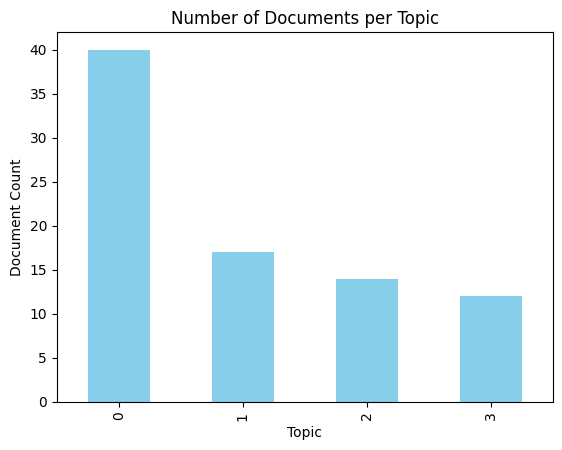

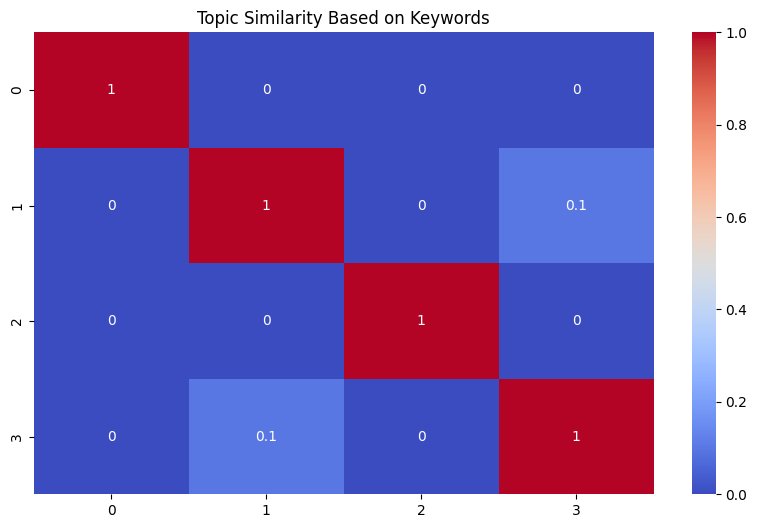

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity  # cosine_similarity 임포트

# 각 토픽의 문서 수 시각화
topic_info.set_index("Topic")["Count"].plot(kind='bar', color='skyblue')
plt.title("Number of Documents per Topic")
plt.xlabel("Topic")
plt.ylabel("Document Count")
plt.show()

# 토픽 간 키워드 유사성 히트맵
# keywords_df는 토픽 정보에서 'Representation' 컬럼을 사용
keywords_df = topic_info[['Topic', 'Representation']]
X = vectorizer_model.transform([str(rep) for rep in keywords_df['Representation']])  # 키워드를 벡터화
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_similarity(X), annot=True, cmap="coolwarm")
plt.title("Topic Similarity Based on Keywords")
plt.show()

In [51]:
# Series의 각 행을 개별적으로 처리하여 키워드 추출
def extract_legal_keywords_series(series, keywords):
    # 각 행(문자열)을 반복하면서 키워드 추출
    filtered_sentences = []
    for text in series:
        if isinstance(text, str):  # 각 행이 문자열인 경우만 처리
            sentences = text.split('. ')  # 문장 단위로 분할
            # 해당 문장 중에서 키워드가 포함된 경우만 필터링
            filtered_sentences.extend([sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)])
    return filtered_sentences

# 적용
legal_related = extract_legal_keywords_series(extracted_text['remove_text'], legal_keywords)

# 결과 출력
legal_related

['Customs and Border Protection (CBP) regulations to reflect the continuation of import restrictions on certain categories of archaeological and ethnological material of Yemen, pursuant to an agreement between the United States and the Republic of Yemen (the Agreement)',
 '2  SUPPLEMENTARY INFORMATION: Background The Convention on Cultural Property Implementation Act (Pub',
 '2601 et seq.) (CPIA), which implements the 1970 United Nations Educational, Scientific and Cultural Organization (UNESCO) Convention on the Means of Prohibiting and Preventing the Illicit Import, Export and Transfer of Ownership of Cultural Property (823 U.N.T.S',
 '231 (1972)) (Convention), allows for the con- clusion of an agreement between the United States and another party to the Convention to impose import restrictions on eligible archaeo- logical and ethnological material',
 'In certain limited circumstances, the CPIA authorizes the imposition of restrictions on an emergency basis (19 U.S.C',
 'The emergenc

In [50]:
import spacy

# spaCy 모델 불러오기 (영어 모델 사용)
nlp = spacy.load("en_core_web_sm")

# 문서 분석 및 법적 용어 추출 함수
def extract_legal_entities(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents if entity.label_ in ("LAW", "ORG", "GPE", "LEGAL")]
    return entities

# 각 텍스트에 대해 엔티티 추출
all_entities = [extract_legal_entities(text) for text in list_of_text]

# 결과 출력
for i, entities in enumerate(all_entities):
    print(f"텍스트 {i + 1}의 법적 엔티티: {entities}")

텍스트 1의 법적 엔티티: [('U.S. Customs and Border Protection ◆ DEPARTMENT OF THE TREASURY', 'ORG'), ('CFR', 'ORG'), ('YEMEN', 'GPE'), ('U.S. Customs and Border Protection,', 'ORG'), ('Department of Homeland Security', 'ORG'), ('Department of the Treasury', 'ORG'), ('the U.S. Customs and Border Protection', 'ORG'), ('Yemen', 'GPE'), ('the United States', 'GPE'), ('the Republic of Yemen', 'GPE'), ('CBP', 'ORG'), ('Yemen', 'GPE'), ('Cargo Security', 'ORG'), ('Restricted Merchandise Branch', 'ORG'), ('Regulations and Rulings', 'ORG'), ('Office of Trade', 'ORG'), ('Trade Policy and Programs', 'ORG'), ('Office of Trade', 'ORG')]
텍스트 2의 법적 엔티티: [('Background The Convention on Cultural Property Implementation Act', 'ORG'), ('U.N.T.S.', 'GPE'), ('the United States', 'GPE'), ('Convention', 'ORG'), ('CPIA', 'ORG'), ('the State Party’s', 'ORG'), ('CPIA', 'ORG'), ('U.S. Customs and Border Protection', 'ORG'), ('CBP', 'ORG'), ('CBP Decision', 'ORG'), ('Yemen', 'GPE'), ('CPIA', 'ORG'), ('the United States', 

텍스트 1~5: 수입 규제 및 문화재 보호 관련 법적 엔티티
- 주요 엔티티: U.S. Customs and Border Protection, Department of Homeland Security, Department of the Treasury, Republic of Yemen, CBP, Yemen, CPIA
- 주제: 주로 **미국 세관 및 국경 보호청(CBP)**과 예멘의 고고학적, 민족학적 문화재 수입 규제와 관련된 규정 및 법적 기관을 다루고 있습니다. 'CPIA'는 Cultural Property Implementation Act (문화재 이행법)을 의미하며, 문화재의 불법 수출입 방지와 관련된 법적 엔티티가 많이 등장합니다.

텍스트 6~10: 특정 문화재 및 역사적 유물 관련 엔티티
- 주요 엔티티: Yemen, Umayyad, Zaydi, Zabid, Ayyubid
- 주제: 이 문서들은 예멘의 특정 역사적 시기(예: 우마이야드, 아유비드 왕조) 및 문화재 분류에 대한 정보를 포함하고 있습니다. 특정 시대나 왕조와 관련된 고고학적 유물에 대한 언급이 많아, 역사적 유물 보호 및 관리에 초점이 맞춰져 있습니다.

텍스트 11~20: 국제 협약 및 해양 보호 관련 법적 엔티티
- 주요 엔티티: United States Department of State, Cultural Property Advisory Committee, National Marine Fisheries Service, Sea Shepherd Conservation Society
- 주제: 미국과 국제 협약(예: 문화재 보호 협약, 해양 보호 협약)과 관련된 내용입니다. 특히 Sea Shepherd Conservation Society와 같은 해양 보호 단체가 등장하며, 불법 어업 방지 및 해양 생태계 보호에 대한 국제 협력 활동이 주요 주제로 보입니다.

텍스트 21~30: 역사적 시기 및 문화재 분류 관련 엔티티
- 주요 엔티티: Ceramic, Porcelain, Faience, Bronze, Written Documents, Ancient Greek
- 주제: 특정 문화재 분류(예: 세라믹, 청동) 및 역사적 유물(예: 그리스 시대의 유물)에 대한 법적 정의와 보호 조치와 관련된 내용입니다.

텍스트 31~40: 수입 규제 및 무역 관련 법적 엔티티
- 주요 엔티티: CBP, Tariff Act, CIT Rule, CFR
- 주제: 주로 수입 규제 및 무역 관련 법적 규정에 대한 내용입니다. Tariff Act는 관세법을 의미하며, CBP는 미국 세관 및 국경 보호청의 규정 및 행정 절차와 관련된 법적 엔티티입니다. CIT는 미국 국제 무역 법원을 의미하여, 수입 규제 및 법적 판결과 관련된 분쟁 및 행정 절차가 포함됩니다.

텍스트 41~50: 국제 무역 분쟁 및 법적 판결
- 주요 엔티티: Court of International Trade, Tariff Act of 1930, Katana, Customs
- 주제: 국제 무역 분쟁과 관련된 법적 엔티티가 등장합니다. Katana라는 특정 사례가 여러 번 등장하며, Tariff Act of 1930와 같은 관세법과 관련된 법적 규제 및 판결 내용이 포함됩니다.

텍스트 51~70: 수입 규제 및 세관 관련 법적 판결
- 주요 엔티티: CBP, Regulatory Flexibility Act, Tariff Act, U.S. Customs and Border Protection
- 주제: 주로 미국 세관 및 국경 보호청과 관련된 규정 및 정책에 대한 내용입니다. 특히 Regulatory Flexibility Act와 같은 법적 규제가 많이 등장하며, 수입 및 무역 규제와 관련된 판결 및 규정 적용에 대한 내용입니다.

텍스트 71~83: 해양 보호 및 국제 분쟁 관련 엔티티
- 주요 엔티티: Sea Shepherd Conservation Society, National Marine Fisheries Service, New Zealand Government, Marine Mammal Protection Act
- 주제: 주로 해양 보호 및 어업 규제와 관련된 국제 분쟁이 주된 내용입니다. New Zealand와 같은 국가 단위 엔티티와 Marine Mammal Protection Act와 같은 해양 보호 관련 법적 엔티티가 포함되어, 해양 생태계 보호 및 불법 어업 방지에 대한 논의가 이루어집니다.

In [88]:
from collections import Counter

# 각 엔티티의 이름만 추출하여 빈도수 계산
entity_names = [entity[0] for entity in all_entities]
entity_freq = Counter(entity_names)

# 빈도수가 높은 상위 10개의 엔티티를 키워드로 출력
keywords = entity_freq.most_common(10)
print(keywords)

[(('the United States', 'GPE'), 4), (('U.S.C.', 'GPE'), 3), (('B.C.', 'GPE'), 3), (('Yemen', 'GPE'), 3), (('CBP', 'ORG'), 3), (('New Zealand', 'GPE'), 3), (('C.E. 11', 'ORG'), 2), (('AGENCY', 'ORG'), 2), (('Katana', 'ORG'), 2), (('Katana', 'GPE'), 2)]


In [93]:
from collections import defaultdict

# 2. 텍스트 별 엔티티를 하나의 문자열로 변환하여 `documents` 리스트에 저장
documents = []

for entity_list in all_entities:
    # 엔티티 리스트에서 각 엔티티의 텍스트만 추출하여 공백으로 연결
    document = " ".join([entity[0] for entity in entity_list])
    documents.append(document)

# 3. 결과 출력
for i, doc in enumerate(documents):
    print(f"Document {i+1}: {doc}")

Document 1: U.S. Customs and Border Protection ◆ DEPARTMENT OF THE TREASURY CFR YEMEN U.S. Customs and Border Protection, Department of Homeland Security Department of the Treasury the U.S. Customs and Border Protection Yemen the United States the Republic of Yemen CBP Yemen Cargo Security Restricted Merchandise Branch Regulations and Rulings Office of Trade Trade Policy and Programs Office of Trade
Document 2: Background The Convention on Cultural Property Implementation Act U.N.T.S. the United States Convention CPIA the State Party’s CPIA U.S. Customs and Border Protection CBP CBP Decision Yemen CPIA the United States the Republic of Yemen1 CPIA Yemen the Designated List § CFR the United States Yemen the State party Yemen
Document 3: U.S.C. Educational and Cultural Affairs United States Department of State the Cultural Property Advisory Committee Yemen the Designated List Yemen B.C. Yemen the Republic of Yemen Government Convention the United States the State Party the Governments of

In [94]:
# TF-IDF 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# 각 문서의 상위 5개 키워드 추출
for i, doc in enumerate(documents):
    tfidf_scores = tfidf_matrix[i].T.todense().tolist()
    doc_keywords = [(feature_names[idx], score) for idx, score in enumerate(tfidf_scores)]
    doc_keywords = sorted(doc_keywords, key=lambda x: x[1], reverse=True)[:5]
    print(f"Document {i+1} Keywords: {doc_keywords}")

Document 1 Keywords: [('yemen', [0.37121893502393977]), ('of', [0.3491715173109635]), ('and', [0.30952880457806725]), ('department', [0.27084946731590326]), ('border', [0.26384561762911535])]
Document 2 Keywords: [('cpia', [0.5093564118429009]), ('yemen', [0.3710000985874145]), ('the', [0.36786924856222447]), ('party', [0.25467820592145046]), ('convention', [0.2406271528770687])]
Document 3 Keywords: [('yemen', [0.5172968795221005]), ('the', [0.3846985790797729]), ('of', [0.3243824048851568]), ('cultural', [0.22367590697960654]), ('state', [0.22367590697960654])]
Document 4 Keywords: [('yemen', [0.7059220738616385]), ('cbp', [0.3043806737303266]), ('the', [0.26248681318791584]), ('cpia', [0.2422950397802543]), ('designated', [0.22892718820447802])]
Document 5 Keywords: [('paper', [0.26753625404702225]), ('umayyad', [0.26753625404702225]), ('zaydi', [0.26753625404702225]), ('ziyadid', [0.26753625404702225]), ('zurayid', [0.26753625404702225])]
Document 6 Keywords: [('bull', [0.707106781

In [97]:
# 1. 각 문서의 상위 5개 키워드 추출 및 리스트에 추가
all_keywords = []
for i, doc in enumerate(documents):
    # 1-1. 각 문서의 TF-IDF 스코어를 가져옴
    tfidf_scores = tfidf_matrix[i].T.todense().tolist()  # tfidf_matrix[i]의 전치(transpose)를 수행 후 리스트로 변환

    # 1-2. 각 단어와 해당 점수를 매칭한 리스트 생성
    doc_keywords = [(feature_names[idx], score[0]) for idx, score in enumerate(tfidf_scores)]

    # 1-3. 상위 5개 키워드 추출
    doc_keywords = sorted(doc_keywords, key=lambda x: x[1], reverse=True)[:5]

    # 1-4. 추출한 키워드만을 리스트에 저장
    all_keywords.extend([keyword for keyword, _ in doc_keywords])  # 점수는 제외하고 키워드만 추가

    print(f"Document {i + 1} Keywords: {doc_keywords}")  # 각 문서의 상위 5개 키워드 출력

Document 1 Keywords: [('yemen', 0.37121893502393977), ('of', 0.3491715173109635), ('and', 0.30952880457806725), ('department', 0.27084946731590326), ('border', 0.26384561762911535)]
Document 2 Keywords: [('cpia', 0.5093564118429009), ('yemen', 0.3710000985874145), ('the', 0.36786924856222447), ('party', 0.25467820592145046), ('convention', 0.2406271528770687)]
Document 3 Keywords: [('yemen', 0.5172968795221005), ('the', 0.3846985790797729), ('of', 0.3243824048851568), ('cultural', 0.22367590697960654), ('state', 0.22367590697960654)]
Document 4 Keywords: [('yemen', 0.7059220738616385), ('cbp', 0.3043806737303266), ('the', 0.26248681318791584), ('cpia', 0.2422950397802543), ('designated', 0.22892718820447802)]
Document 5 Keywords: [('paper', 0.26753625404702225), ('umayyad', 0.26753625404702225), ('zaydi', 0.26753625404702225), ('ziyadid', 0.26753625404702225), ('zurayid', 0.26753625404702225)]
Document 6 Keywords: [('bull', 0.7071067811865475), ('oxen', 0.7071067811865475), ('10th', 0.

In [ ]:
all_keywords

In [101]:
# 3. 키워드별 빈도수 계산
keyword_frequencies = Counter(all_keywords)

# 4. 결과 출력
for keyword, freq in keyword_frequencies.items():
    print(f"'{keyword}': {freq}")

'yemen': 8
'of': 8
'and': 4
'department': 4
'border': 2
'cpia': 3
'the': 12
'party': 2
'convention': 2
'cultural': 1
'state': 2
'cbp': 8
'designated': 1
'paper': 1
'umayyad': 1
'zaydi': 1
'ziyadid': 1
'zurayid': 1
'bull': 1
'oxen': 1
'10th': 9
'11': 6
'1111': 3
'non': 1
'sculpture': 1
'architectural': 1
'relief': 1
'album': 1
'pp': 1
'york': 3
'new': 10
'athena': 1
'almaqah': 1
'athens': 1
'augustus': 1
'herakles': 1
'zabid': 1
'bukur': 1
'al': 1
'acro': 1
'kawkaban': 1
'san': 1
'teria': 1
'thula': 1
'period': 1
'abbasid': 1
'africa': 1
'east': 1
'handles': 1
'painting': 1
'stucco': 1
'decoration': 1
'wall': 1
'ivory': 1
'daily': 1
'inscribed': 1
'use': 1
'documents': 1
'manuscripts': 1
'quran': 2
'planning': 1
'review': 1
'regulatory': 3
'cfr': 3
'flexibility': 2
'act': 2
'regulations': 2
'director': 2
'disclosure': 2
'law': 2
'on': 1
'implementation': 1
'ukraine': 3
'glass': 1
'human': 1
'mesolithic': 1
'remains': 1
'ceramic': 2
'archaeological': 1
'ago': 1
'depict': 1
'eneolithic': 

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 설정
tfidf = TfidfVectorizer(stop_words='english', max_features=50)

# fit_transform에 직접 list_of_text 전달 (리스트로 감싸지 않음)
tfidf_matrix = tfidf.fit_transform(list_of_text)

# 피처 이름 추출
feature_names = tfidf.get_feature_names_out()

# 결과 출력
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("TF-IDF Features:", feature_names)

TF-IDF Matrix Shape: (83, 50)
TF-IDF Features: ['12' '1592' '1774' '19' '2024' '3d' 'approximate' 'bronze' 'cbp' 'cit'
 'claim' 'coins' 'court' 'customs' 'date' 'dates' 'decorated' 'elements'
 'ethnological' 'government' 'id' 'include' 'includes' 'including'
 'information' 'judgment' 'katana' 'limited' 'material' 'motion' 'new'
 'ny' 'objects' 'painted' 'period' 'plaintiffs' 'relief' 'religious'
 'rule' 'shepherd' 'small' 'states' 'stone' 'summary' 'supp' 'types'
 'united' 'used' 'vessels' 'zealand']


 **TF-IDF 행렬의 크기 (83, 50)**은 각 문서(83개)가 50개의 주요 단어로 표현되었음을 의미

- 'cbp', 'customs': 문서에서 자주 등장한 세관(Customs and Border Protection)과 관련된 용어.
- 'ethnological', 'archaeological': 민족학적, 고고학적 유물이나 자료와 관련된 용어.
- 'court', 'judgment', 'plaintiffs', 'claim': 법적 관련 용어.
- 'period', 'dates', '1774', '2024': 특정 시기와 날짜를 나타내는 용어.
- 'material', 'stone', 'vessels', 'bronze': 고고학적 또는 유물과 관련된 구체적인 재질 또는 형태.
- 'rule', 'regulation', 'summary': 규정, 법률 또는 정책 관련 용어.

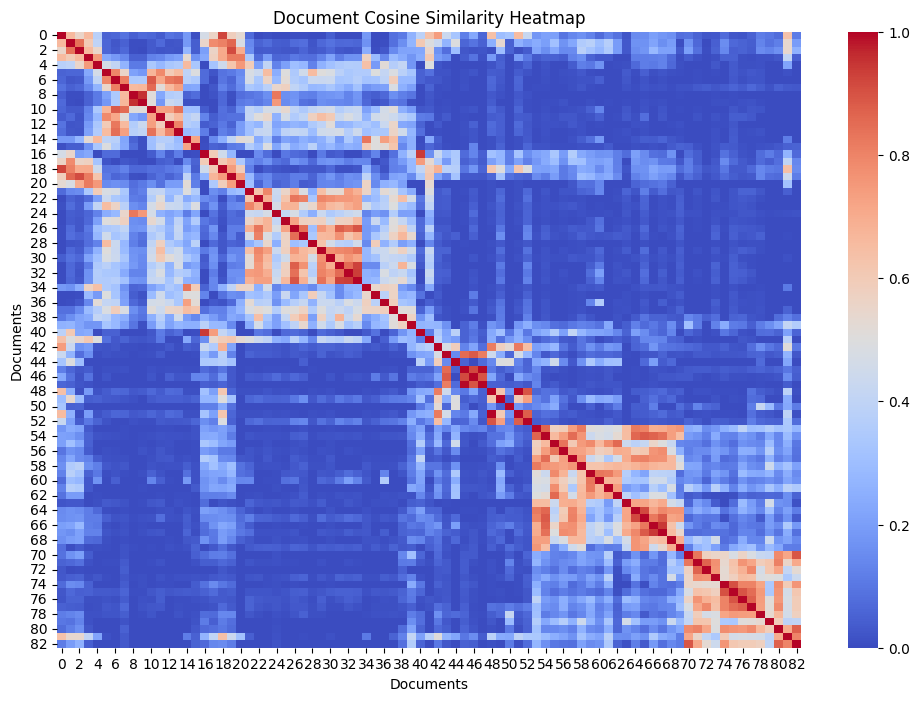

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# TF-IDF 행렬이 이미 존재한다는 가정 (tfidf_matrix)
# 문서 간 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 코사인 유사도를 DataFrame 형태로 변환
cosine_df = pd.DataFrame(cosine_sim)

# 코사인 유사도 행렬을 시각화하기 위해 보여줌
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cosine_df, cmap='coolwarm')
plt.title("Document Cosine Similarity Heatmap")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.show()

In [57]:
from bertopic import BERTopic

# BERTopic 모델 생성 및 학습
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(list_of_text)  # list_of_text는 각 문서의 리스트

# 각 문서의 할당된 주제 및 주요 토픽 출력
topic_info = topic_model.get_topic_info()
print(topic_info)

   Topic  Count              Name  \
0      0     54   0_and_of_the_or   
1      1     17  1_the_of_to_that   
2      2     12  2_the_of_new_see   

                                      Representation  \
0  [and, of, the, or, to, in, with, are, may, app...   
1  [the, of, to, that, for, katana, is, at, in, m...   
2  [the, of, new, see, to, and, in, plaintiffs, z...   

                                 Representative_Docs  
0  [31  9. Lamps and Lighting—Including, but not ...  
1  [61  provided that, on remand, “Katana will be...  
2  [81  ing that New Zealand had not established ...  


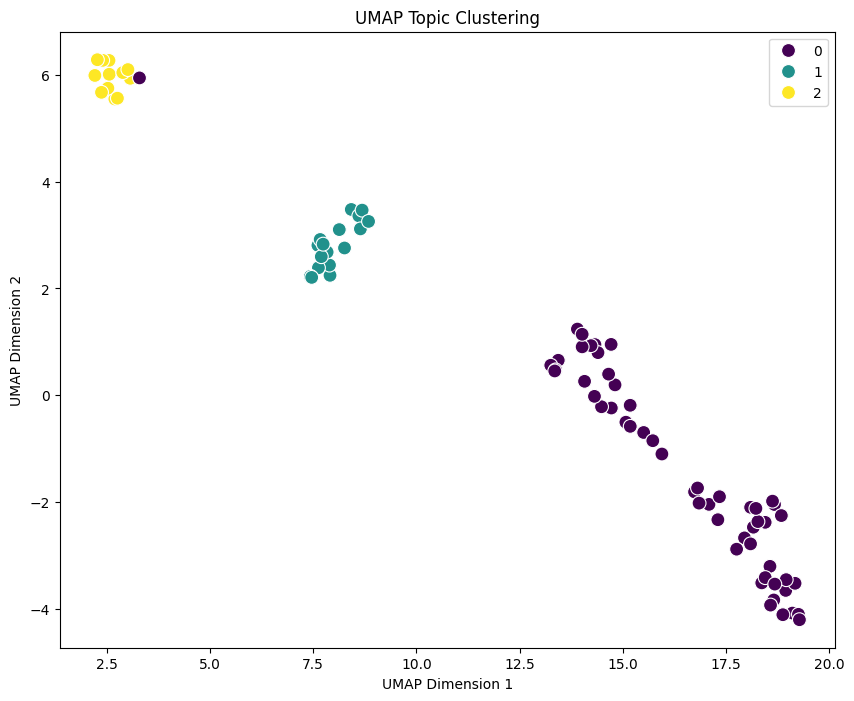

In [58]:
from umap import UMAP

# UMAP 차원 축소 모델 생성
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine')

# TF-IDF 행렬에 대해 UMAP 적용하여 차원 축소 수행
umap_embeddings = umap_model.fit_transform(tfidf_matrix.toarray())  # 2D 좌표로 축소

# UMAP 결과를 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=topics, palette="viridis", s=100)
plt.title("UMAP Topic Clustering")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(loc='upper right')
plt.show()

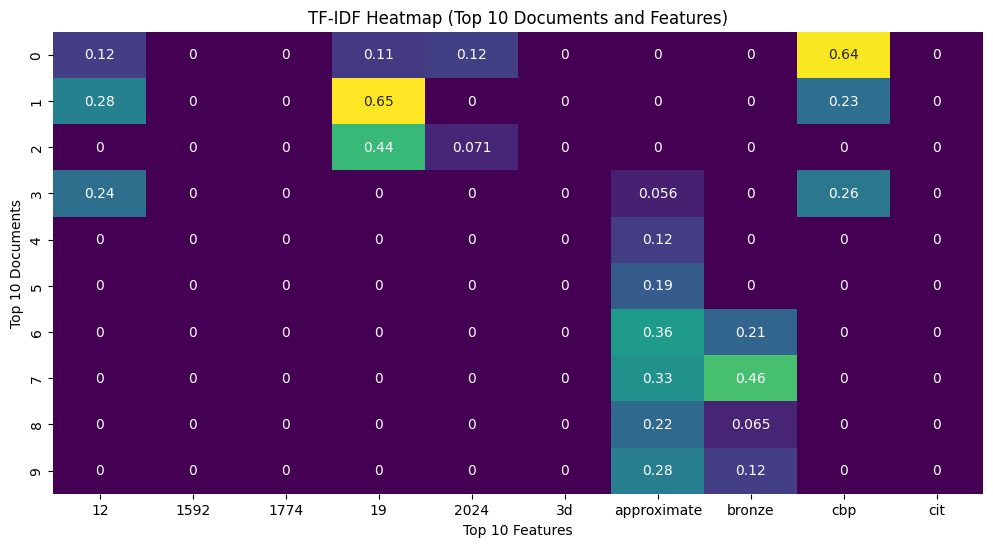

In [59]:
import seaborn as sns

# TF-IDF 행렬을 데이터프레임으로 변환하여 단어 특징 이름을 열 이름으로 설정
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# 상위 10개의 문서와 10개의 단어에 대해 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df.iloc[:10, :10], cmap='viridis', annot=True, cbar=False)
plt.title("TF-IDF Heatmap (Top 10 Documents and Features)")
plt.xlabel("Top 10 Features")
plt.ylabel("Top 10 Documents")
plt.show()

In [62]:
# 특정 패턴을 사용하여 세관 항목 추출
import re

# 세관 규제와 관련된 텍스트 패턴 설정
pattern = r"Import Restrictions on .* Material of .*"

# 특정 패턴을 사용하여 세관 항목 추출 (리스트 내 텍스트 각각을 순회)
matches_part = []
for text in list_of_text:
    found = re.findall(pattern, text)
    matches_part.extend(found)  # 찾은 패턴을 리스트에 추가

# 결과 출력
print("Matched Patterns:", matches_part)

Matched Patterns: ['Import Restrictions on Categories of Archaeological and Ethnological Material of Yemen,’’ (the Agreement) pursuant to the provisions of 19 U.S.C. 2602(a)(2). The Agreement entered into force on April 15, 2024, following the exchange of diplomatic notes, and modifies the previously imposed emergency import restrictions on archaeological material dated from approximately 200,000 B.C. to A.D. 1773, as well as certain ethnological material of Yemeni cultural heritage from A.D. 1517 through 1918. A list of the categories of archaeological and ethnological material subject to the import restric- tions is set forth later in this document.', 'Import Restrictions on Archaeological and Ethnological Material of Yemen . . . . . . . . . . . . . . . . . . . 24–15 1 Emergency Import Restrictions Imposed on Categories of Archaeological and Ethnological Material of Ukraine . . . . . 24–16 19 General Notices Page Revocation of Five Ruling Letters and Revocation of Treatment Relating 

In [63]:
# 리스트의 모든 텍스트를 하나의 큰 문자열로 병합
combined_text = " ".join(list_of_text)

# 패턴 매칭 수행
matches_all= re.findall(pattern, combined_text)

# 결과 출력
print("Matched Patterns:", matches_all)

Matched Patterns: ['Import Restrictions on Categories of Archaeological and Ethnological Material of Yemen,’’ (the Agreement) pursuant to the provisions of 19 U.S.C. 2602(a)(2). The Agreement entered into force on April 15, 2024, following the exchange of diplomatic notes, and modifies the previously imposed emergency import restrictions on archaeological material dated from approximately 200,000 B.C. to A.D. 1773, as well as certain ethnological material of Yemeni cultural heritage from A.D. 1517 through 1918. A list of the categories of archaeological and ethnological material subject to the import restric- tions is set forth later in this document. 4  Restrictions and Amendment to the Regulations Import restrictions on the archaeological and ethnological material of Yemen previously reflected in § 12.104g(b) will be continued through the Agreement without interruption. Accordingly, § 12.104g(a) of the CBP regulations is being amended to indicate that restrictions have been imposed p

In [64]:
matches_part

['Import Restrictions on Categories of Archaeological and Ethnological Material of Yemen,’’ (the Agreement) pursuant to the provisions of 19 U.S.C. 2602(a)(2). The Agreement entered into force on April 15, 2024, following the exchange of diplomatic notes, and modifies the previously imposed emergency import restrictions on archaeological material dated from approximately 200,000 B.C. to A.D. 1773, as well as certain ethnological material of Yemeni cultural heritage from A.D. 1517 through 1918. A list of the categories of archaeological and ethnological material subject to the import restric- tions is set forth later in this document.',
 'Import Restrictions on Archaeological and Ethnological Material of Yemen . . . . . . . . . . . . . . . . . . . 24–15 1 Emergency Import Restrictions Imposed on Categories of Archaeological and Ethnological Material of Ukraine . . . . . 24–16 19 General Notices Page Revocation of Five Ruling Letters and Revocation of Treatment Relating to the Tariff Cla

In [65]:
matches_all

['Import Restrictions on Categories of Archaeological and Ethnological Material of Yemen,’’ (the Agreement) pursuant to the provisions of 19 U.S.C. 2602(a)(2). The Agreement entered into force on April 15, 2024, following the exchange of diplomatic notes, and modifies the previously imposed emergency import restrictions on archaeological material dated from approximately 200,000 B.C. to A.D. 1773, as well as certain ethnological material of Yemeni cultural heritage from A.D. 1517 through 1918. A list of the categories of archaeological and ethnological material subject to the import restric- tions is set forth later in this document. 4  Restrictions and Amendment to the Regulations Import restrictions on the archaeological and ethnological material of Yemen previously reflected in § 12.104g(b) will be continued through the Agreement without interruption. Accordingly, § 12.104g(a) of the CBP regulations is being amended to indicate that restrictions have been imposed pursuant to the Agr

In [79]:
# 불필요한 숫자 및 페이지 정보 제거
cleaned_sentences = [re.sub(r'\d+–\d+', '', sentence) for sentence in split_sentences]

# 불필요한 키워드 제거
keywords_to_remove = ['Plaintiffs', 'Defendants', 'CBP', 'Department', 'United States']
cleaned_sentences = [' '.join([word for word in sentence.split() if word not in keywords_to_remove]) for sentence in cleaned_sentences]

# 전처리된 결과 확인
print("Cleaned Sentences:", cleaned_sentences[:5])

# BERTopic 모델 재학습
if cleaned_sentences and len(cleaned_sentences) > 0:
    topics, probs = topic_model.fit_transform(cleaned_sentences)
    print("Extracted topics:", topics)
else:
    print("No valid text to process.")

Cleaned Sentences: ['Import Restrictions on Categories of Archaeological and Ethnological Material of Yemen,’’ (the Agreement) pursuant to the provisions of 19 U', 'S', 'C', '2602(a)(2)', 'The Agreement entered into force on April 15, 2024, following the exchange of diplomatic notes, and modifies the previously imposed emergency import restrictions on archaeological material dated from approximately 200,000 B']
Extracted topics: [0, 1, 1, 1, 0, 1, 1, 1, -1, 1, -1, -1, -1, -1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, -1, 0, 1]


In [ ]:
# 각 토픽의 키워드 확인
topic_info = topic_model.get_topic_info()
print("Topic Information:\n", topic_info)

# 각 토픽별 키워드 확인
for topic_id in set(topics):
    if topic_id != -1:  # 노이즈 토픽(-1)은 제외
        print(f"\nTopic {topic_id}:")
        print(topic_model.get_topic(topic_id))

Extracted Topics: [3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Topic Info:
    Topic  Count                                               Name  \
0      0     16  0_katana asserts_remand katana_statute limitat...   
1      1     12  1_pursuant usc cbp_cbp classified_border prote...   
2      2     10  2_fisheries service janet_zealand sea shepherd...   
3      3      9  3_emergency import restrictions_import restric...   

                                      Representation  \
0  [katana asserts, remand katana, statute limita...   
1  [pursuant usc cbp, cbp classified, border prot...   
2  [fisheries service janet, zealand sea shepherd...   
3  [emergency import restrictions, import restric...   

                                 Representative_Docs  
0  [E Katanas assertion of affirmative misconduct...  
1  [and promoting flexibility CBP has determined ...  
2  [IV CIT __ F Supp d ECF No 

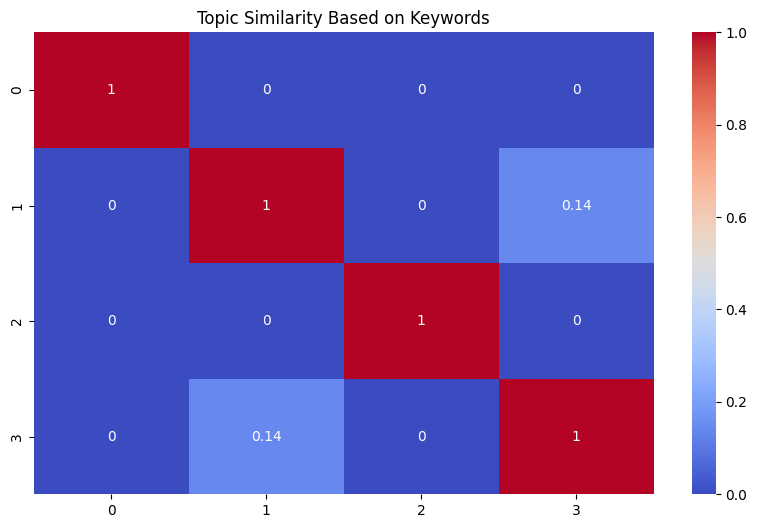

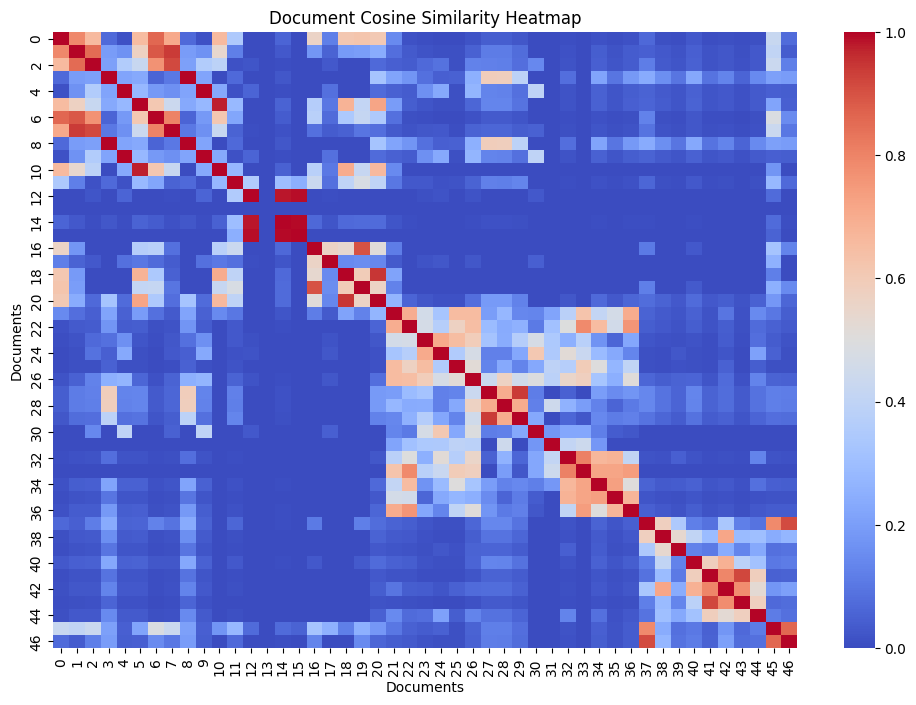

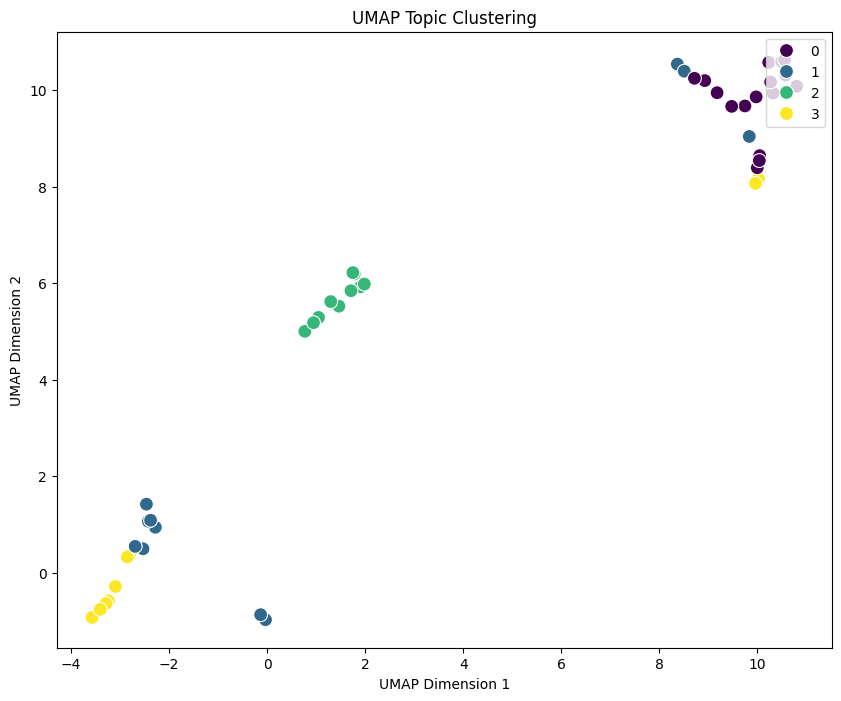

In [83]:
# 필수 패키지 임포트
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# 1. 데이터 불러오기
extracted_text = pd.read_csv('https://raw.githubusercontent.com/young0jin/CustomsNotifyAnalyzer/refs/heads/main/NLP/extracted_text.csv')

# 2. 전처리: 특정 불필요한 문구 제거
extracted_text['remove_text'] = extracted_text['text'].str.replace("CUSTOMS BULLETIN AND DECISIONS, VOL. 58, NO. 38, SEPTEMBER 25, 2024", "", regex=False)

# 3. 'U.S.'로 시작하는 행만 필터링
filtered_rows = extracted_text[extracted_text['remove_text'].str.contains(r'(^\d+\s+)?U\.S\.', regex=True)]

# 4. 불필요한 특수 문자 및 숫자 제거 (전처리 강화)
def clean_text(text):
    # 모든 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 불필요한 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 5. 텍스트 정제 수행
filtered_rows['cleaned_text'] = filtered_rows['remove_text'].apply(lambda x: clean_text(x))

# 6. 리스트 형태로 변환
list_of_text = filtered_rows['cleaned_text'].tolist()

# 7. 불용어 제거 및 n-gram 설정
vectorizer_model = CountVectorizer(stop_words='english', max_features=3000, ngram_range=(2, 3))

# 8. BERTopic 모델 설정 (옵션 조정)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
umap_model = UMAP(n_neighbors=5, n_components=2, min_dist=0.0, metric='cosine')
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# 9. BERTopic 모델 생성
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    representation_model=representation_model
)

# 10. 문서 데이터를 학습하여 토픽 추출
topics, probs = topic_model.fit_transform(list_of_text)

# 11. 각 토픽에 대한 정보 확인
topic_info = topic_model.get_topic_info()
print("Extracted Topics:", topics)
print("Topic Info:\n", topic_info)

# 12. 주요 토픽별 키워드 출력
for topic_id in set(topics):
    if topic_id != -1:  # 노이즈 토픽(-1)은 제외
        print(f"\nKeywords for Topic {topic_id}:")
        print(topic_model.get_topic(topic_id))

# 13. 토픽 간 유사성 시각화
keywords_df = topic_info[['Topic', 'Representation']]
X = vectorizer_model.transform([str(rep) for rep in keywords_df['Representation']])
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_similarity(X), annot=True, cmap="coolwarm")
plt.title("Topic Similarity Based on Keywords")
plt.show()

# 14. TF-IDF 기반 코사인 유사도 계산
tfidf = TfidfVectorizer(stop_words='english', max_features=50, ngram_range=(2, 3))
tfidf_matrix = tfidf.fit_transform(list_of_text)
cosine_sim = cosine_similarity(tfidf_matrix)

# 15. 문서 간 코사인 유사도 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(cosine_sim), cmap='coolwarm')
plt.title("Document Cosine Similarity Heatmap")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.show()

# 16. UMAP 기반 군집 시각화
umap_embeddings = umap_model.fit_transform(tfidf_matrix.toarray())  # 2D 좌표로 축소
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=topics, palette="viridis", s=100)
plt.title("UMAP Topic Clustering")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(loc='upper right')
plt.show()

1. 전체 결과 요약
- 총 4개의 토픽이 추출되었으며, 각 토픽은 다음과 같이 구성되어 있습니다:
  - Topic 0: 16개의 문서 포함
  - Topic 1: 12개의 문서 포함
  - Topic 2: 10개의 문서 포함
  - Topic 3: 9개의 문서 포함
- 총 47개의 문서가 분석에 사용되었습니다.


2. 각 토픽의 의미 및 주요 키워드 분석
- Topic 0: 법률적 주장과 판결 (Legal Claims and Rulings)
  - 주요 키워드: 'katana asserts', 'remand katana', 'statute limitations waiver', 'katana ii', 'waiver statute', 'katanas motion dismiss'
  - 해석: 이 토픽은 특정 법적 주장과 판결에 관련된 내용입니다. katana라는 용어와 관련된 법적 사례 및 판결이 주요 키워드로 등장하고 있습니다. "Statute of Limitations" (소멸시효)와 같은 법적 용어가 반복되므로, 이 토픽은 법적 분쟁, 소송, 판결과 같은 주제를 다루고 있는 것으로 보입니다.

- Topic 1: 세관 및 관세 관련 규정 (Customs and Border Protection Regulations)

- 주요 키워드: 'pursuant usc cbp', 'cbp classified', 'border protection cbp', 'accorded cbp', 'customs bulletin', 'protection cbp'
- 해석: 이 토픽은 미국의 세관(Customs) 및 **국경 보호(Border Protection)**와 관련된 규정 및 행정 조치에 대한 내용입니다. cbp는 Customs and Border Protection (미국 세관 및 국경 보호청)을 의미하며, 규정 및 법적 조치에 대한 설명이 주를 이루고 있습니다.

- Topic 2: 해양 보호 및 어업 규제 (Marine Protection and Fisheries Regulations)
  - 주요 키워드: 'fisheries service janet', 'zealand sea shepherd', 'fisheries service national', 'sea shepherd nz', 'new zealand government', 'national marine fisheries'
  - 해석: 이 토픽은 해양 보호, 어업 규제와 관련된 내용입니다. Sea Shepherd는 해양 생태계를 보호하는 비영리 단체이며, 주로 해양 생태계 보전 및 불법 어업 감시에 중점을 두고 있습니다. 따라서, 이 토픽은 뉴질랜드와 미국 간의 해양 보호 협력 및 규제에 대한 내용으로 볼 수 있습니다.

- Topic 3: 긴급 수입 규제 및 유물 보호 (Emergency Import Restrictions and Cultural Property Protection)
  - 주요 키워드: 'emergency import restrictions', 'import restrictions imposed', 'customs border protection', 'ethnological material yemen', 'material yemen', 'import restrictions categories'
  - 해석: 이 토픽은 긴급 수입 규제와 문화재 보호에 관련된 주제입니다. Yemen과 같은 국가와 관련된 수입 규제가 주요 키워드로 등장하며, 고고학적 및 민족학적 유물에 대한 수입 규제와 보호 조치에 대한 내용입니다. 문화재의 불법 수출입 방지 및 유물 보호와 관련된 규제가 이 토픽의 핵심 주제입니다.

3. 각 토픽의 키워드 해석
- Topic 0의 키워드는 katana라는 특정 법적 사례에 대한 주장을 중심으로 waiver statute limitations와 같은 법률 용어들이 나타나며, 특정 법적 판결이나 소송에 대한 논의가 중심인 것으로 보입니다.

- Topic 1의 키워드는 세관과 관련된 법적 용어(cbp, border protection, customs)가 많이 등장하며, 이 토픽은 세관 행정 절차와 관련된 내용입니다.

- Topic 2의 키워드는 해양 보호와 관련된 기관(fisheries service, sea shepherd) 및 정부 간의 협력 내용을 포함하고 있어 해양 환경 보호 및 불법 어업 방지에 중점을 둔 내용입니다.

- Topic 3의 키워드는 긴급 수입 규제(emergency import restrictions) 및 민족학적 자료(ethnological material)와 같은 용어를 포함하고 있으며, 주로 문화재 및 고고학적 유물에 대한 긴급 수입 규제를 다룹니다.